# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [230]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [298]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [232]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [233]:
boston.data.shape

(506, 13)

In [234]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [235]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [236]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [237]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [238]:
print(boston.target.shape)

(506,)


In [239]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [240]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

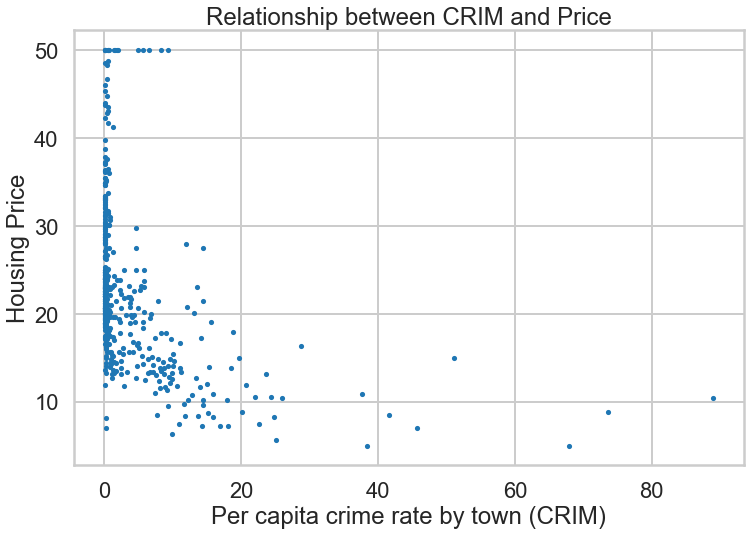

In [241]:
plt.figure(figsize=(12,8))
plt.scatter(bos.CRIM, bos.PRICE,s=10)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [242]:
# your turn: describe relationship

__A__:
The original form of the data points on the plot was so large that I first reduced the size in order to view them more clearly, then increased the size of the plot.

The shape of the crime v price plot resembles an inverse relationship, or perhaps a decaying exponential. The housing price appears to reduce as the per capita crime rate increases, and could be asymptotic to some number in a large limit. There are some peculiar points at the top of the graph, which seem to show resistance to price fluctiations regardless of the increased crime rate. Discovering why would be interesting to investors and homeowners alike. Another odd feature is the cluster of points so close to the zero crime rate, and how it spans the entire price range of houses. Once moving away from a few percent, the bandwidth of prices decreases drastically. 

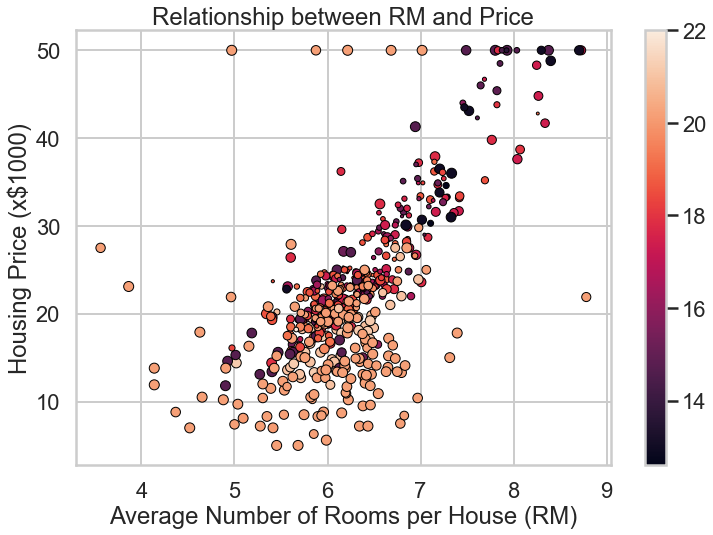

In [243]:
# your turn: scatter plot between *RM* and *PRICE*
_=plt.figure(figsize=(12,8))
sc=plt.scatter(bos.RM, bos.PRICE, s=bos.AGE, edgecolor='k', linewidths=1, c=bos.PTRATIO)
_=plt.colorbar(sc)
_=plt.xlabel("Average Number of Rooms per House (RM)")
_=plt.ylabel("Housing Price (x$1000)")
_=plt.title("Relationship between RM and Price")

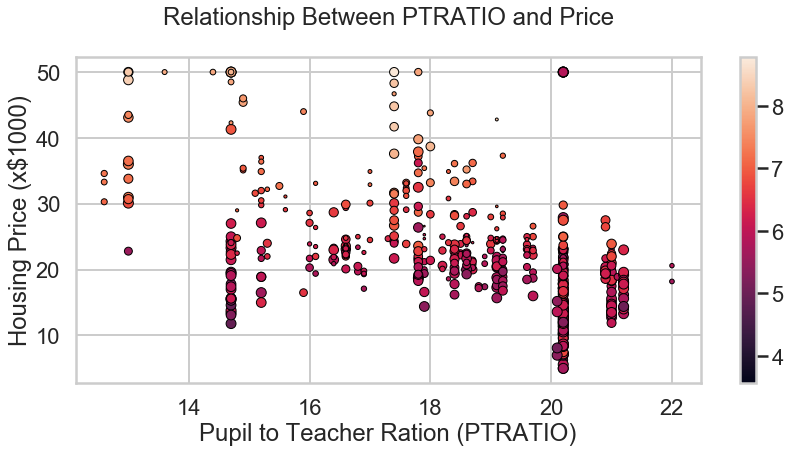

In [244]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
_=plt.figure(figsize=(14,6))
sc=plt.scatter(bos.PTRATIO,bos.PRICE, edgecolor='k', linewidth=1, s=bos.AGE, c=bos.RM)
_=plt.colorbar(sc)
_=plt.xlabel('Pupil to Teacher Ration (PTRATIO)')
_=plt.ylabel('Housing Price (x$1000)')
_=plt.title('Relationship Between PTRATIO and Price\n')

__STORY__:
The price of houses increases with number of rooms above four, generally. There is a cluster in the lower price range with houses that are low valued for their number of rooms. There are also a number of houses at the top of the plot that are more highly valued than houses with the same number of rooms. Curiously, the price of houses seems to increase when the number of rooms decreases below four.

Housing price seems to be higher when the pupil/teacher ratio is smaller, but there are much fewer examples of these. The largest ratio seems to be a little over 20, with this ratio falling among the lowest housing prices, but covering a large span of prices. There appears to be spikes of population with higher home values around P/T ratios of 13, 15, and 17 as well. Overall the general trend for housing price seems to be linearly downward as the pupil to teacher ratio increases.

Looking at the two plots together, it appears that those who dwell in lower valued houses live a more crowded existence overall. The pupil to teacher ratio is higher, meaning more people and even more people per household. At the same time, those houses are on the smaller end, having between 4 and 6 rooms on average. So we see a general trend of more people in less space in the lower income houses, and the opposite for those with higher value.

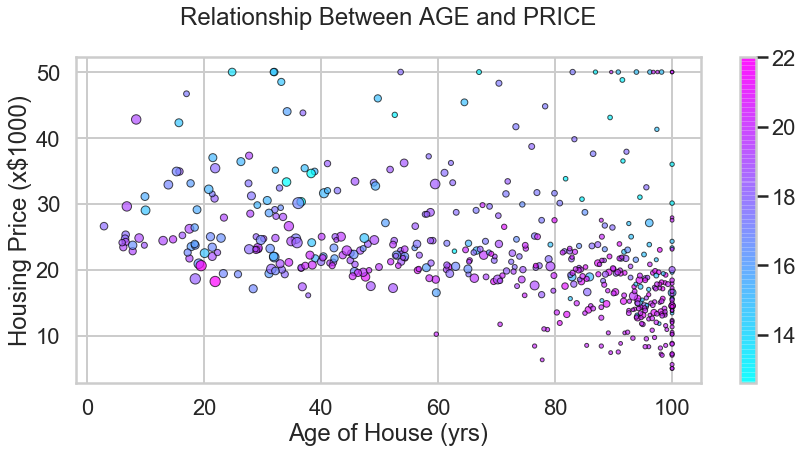

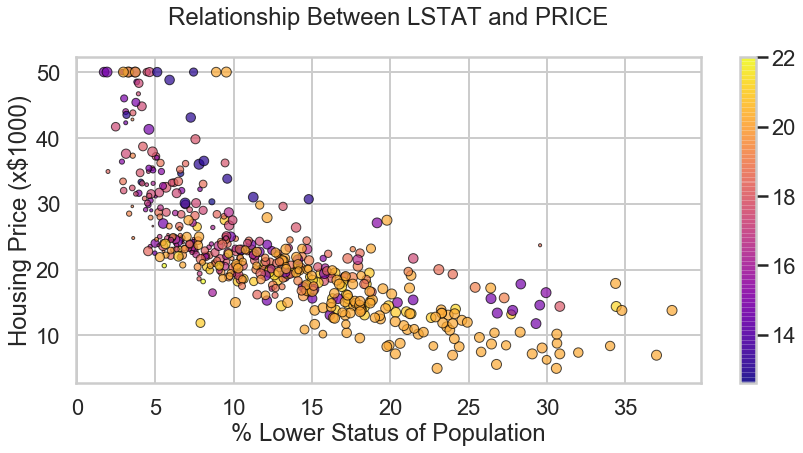

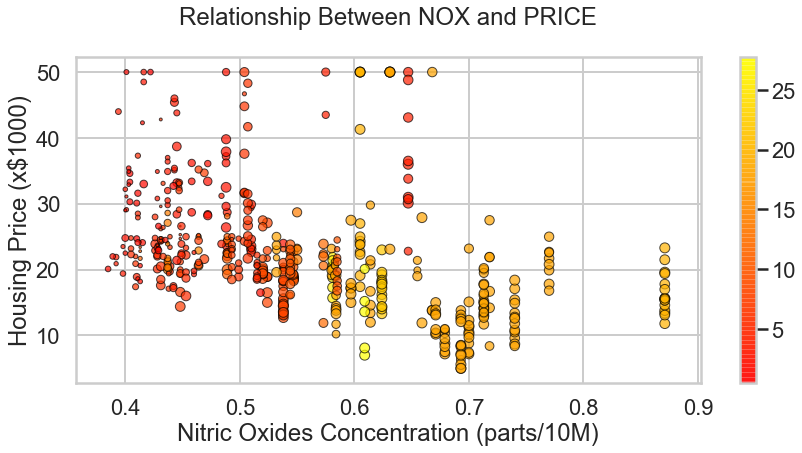

In [245]:
# your turn: create some other scatter plots
#print(bos.columns)
_=plt.figure(figsize=(14,6))
sc=plt.scatter(bos.AGE, bos.PRICE, s=bos.DIS*10, c=bos.PTRATIO, edgecolor='k', linewidth=1, cmap='cool', alpha=.7)
_=plt.xlabel('Age of House (yrs)')
_=plt.ylabel('Housing Price (x$1000)')
_=plt.colorbar(sc)
_=plt.title('Relationship Between AGE and PRICE\n')

_=plt.figure(figsize=(14,6))
sc=plt.scatter(bos.LSTAT, bos.PRICE, s=bos.AGE, c=bos.PTRATIO, edgecolor='k', linewidth=1, cmap='plasma', alpha=.7)
_=plt.xlabel('% Lower Status of Population')
_=plt.ylabel('Housing Price (x$1000)')
_=plt.colorbar(sc)
_=plt.title('Relationship Between LSTAT and PRICE\n')

_=plt.figure(figsize=(14,6))
sc=plt.scatter(bos.NOX, bos.PRICE, s=bos.AGE, c=bos.INDUS, edgecolor='k', linewidth=1, cmap='autumn', alpha=.7)
_=plt.xlabel('Nitric Oxides Concentration (parts/10M)')
_=plt.ylabel('Housing Price (x$1000)')
_=plt.colorbar(sc)
_=plt.title('Relationship Between NOX and PRICE\n')


__STORY__:
Adding color let's us explore a third variable. Looking at age vs. price color coded by number of rooms shows us that about 100 years ago the houses being built were much smaller, and those are now generally low valued. The disparity between education and income brackets can be seen in the second plot. The pupil to teacher ratio is clearly larger for the lower percent in the lower valued dwellings. In the third we see the effect of industry on housing price. The higher the industry percentage, the higher the nitric oxide concentration, and lower the housing price. 

Putting these three together we can see again that the lower percent of the population has a vastly different expereince than those that can afford larger, high cost housing. The cheaper neighborhoods tend to be more crowded in the home and the classroom, with worse air quality overall due to the higher concentration of industry. 

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

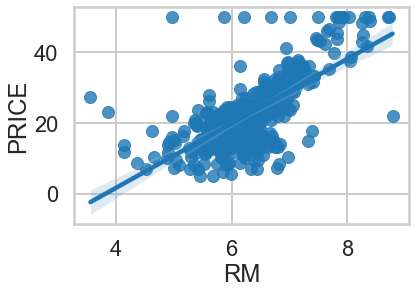

In [246]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


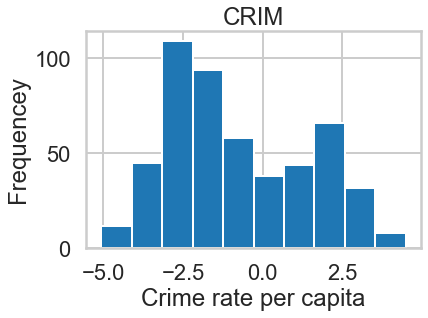

In [247]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

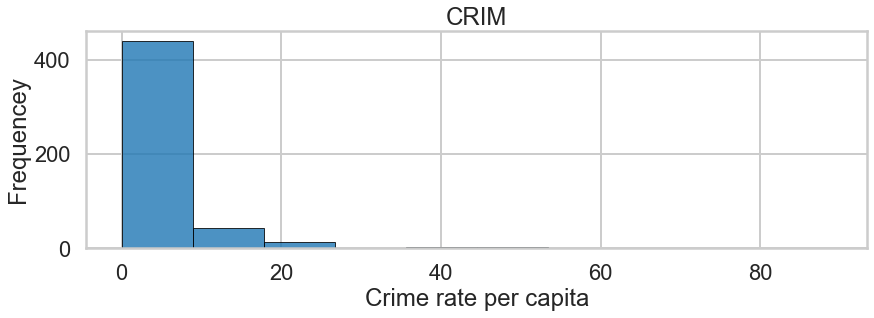

In [248]:
#your turn
_=plt.figure(figsize=(14,4))
_=plt.hist(bos.CRIM, edgecolor='k', linewidth=1, alpha=.8)
_=plt.title("CRIM")
_=plt.xlabel("Crime rate per capita")
_=plt.ylabel("Frequencey")
plt.show()

The purpose of taking the log of the data is to eliminate the huge disparity in frequency seen above. When one element is vastly larger than the other elements, taking the log helps to put them on more equal footing. This reveals trends that aren't visible by looking at the raw data. After making the transformation the variable appears to be more of a bi-modal distribution; it is no longer a decaying exponential or inverse distribution.

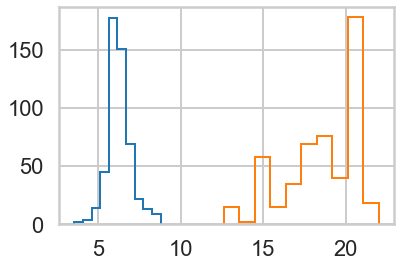

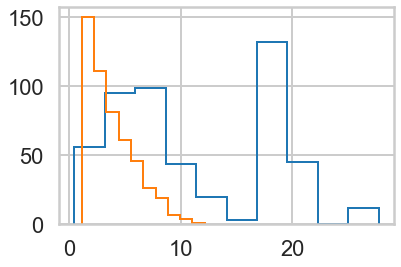

In [249]:
_=plt.hist(bos.RM,histtype='step')
_=plt.hist(bos.PTRATIO,histtype='step')
plt.show()
_=plt.hist(bos.INDUS,histtype='step')
_=plt.hist(bos.DIS,histtype='step')
#_=plt.legend(['RM','PTRATIO','INDUS','DIS'])

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [250]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [300]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           2.49e-74
Time:                        09:57:04   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

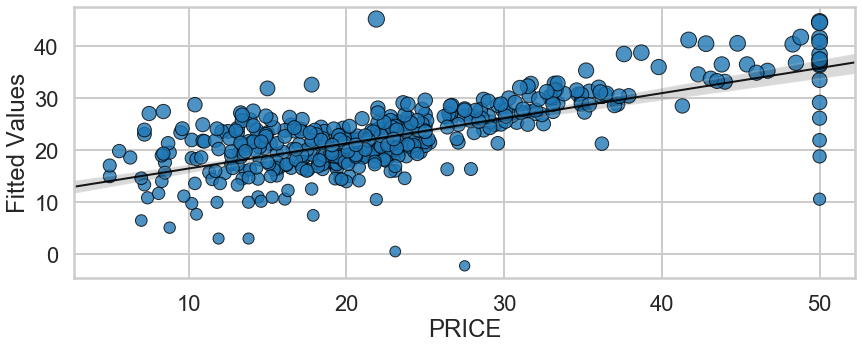

In [301]:
# your turn
_=plt.figure(figsize=(14,5))
_=sns.regplot(x=bos.PRICE, y=m.fittedvalues, scatter_kws={'s':bos.RM*30, 'edgecolor':'k'}, 
              line_kws={'color':'k', 'alpha':.9, 'linewidth':2}, truncate=False)
_=plt.ylabel('Fitted Values')

The plot takes on a linear character, with the predicted prices being pretty close to the actual prices for many of the examples. There are some serious undervaluations, the most obvious being along the 50K line. A curious prediction even lies in the negative price range, and another at almost zero. These owners would be severely disappointed to hear these valuations.
The lower prices also show much more error in the spread of values for predictions at a given price, such as 10K. There are also some problems with classifying some of the houses near the 25K range, showing the greatest discrepancy in actual vs. predicted prices. Overall it seems to be more accurate for higher valued houses up to 50K.

### Fitting Linear Regression using `sklearn`


In [253]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [254]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [255]:
# Use all 13 predictors to fit linear regression model
reg = lm.fit(X, bos.PRICE)
reg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [256]:
reg.intercept_

36.45948838509009

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [257]:
# your turn
#To not calculate the intercept, simply change the value of fit_intercept to False.
lm=LinearRegression(fit_intercept=False)
reg = lm.fit(X, bos.PRICE)
reg.coef_

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

Setting the intercept to zero will ensure that the fit line passes through the origin. Each individual situation must be evaluated to determine if this makes sense. Intuition would lead to the expectation that zero rooms should coincide with zero price. A line of best fit would appear to intercept the predicted price line above zero for a house with zero rooms. In this case, it would seem to make sense to not calculate the intercept. The tradeoff is a loss of prediction accuracy for houses with lower values. Additionally, for some vector space considerations it is important that the origin be included, so as to be a subspace. The costs and benefits of conceptual or mathematical consistency vs. accuracy in prediction must be weighed with each case.

Resolution to the problem in this case is found in the physical nonsense of the idea of a house with no rooms. Because this isn't necessarily possible (can you consider it a house if it doesn't even have one complete room?), there is no reason to have an intercept term passing through the origin, even though at first it is conceptually tantalizing. Better utility is found in accuracy of predictions for a fit line that has an intercept above zero, while simply not considering values below some threshold for house definition.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [258]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 0.0


In [259]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [260]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.092897
1,ZN,0.048715
2,INDUS,-0.004060
3,CHAS,2.853999
4,NOX,-2.868436
5,RM,5.928148
6,AGE,-0.007269
7,DIS,-0.968514
8,RAD,0.171151
9,TAX,-0.009396


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [261]:
# first five predicted prices
lm.predict(X)[0:5]

array([29.09826353, 24.50227548, 31.22742641, 29.7071035 , 29.56479572])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

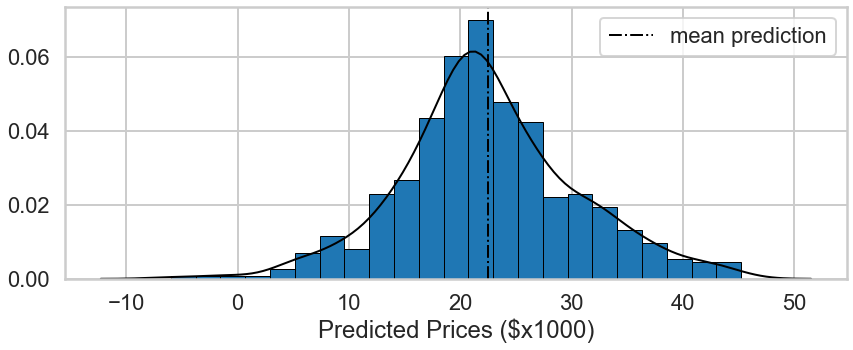

In [262]:
# your turn
pred = pd.Series(lm.predict(X),name='Predicted Prices ($x1000)')
_=plt.figure(figsize=(14,5))
_=sns.distplot(pred, hist_kws={'edgecolor':'k', 'alpha':1, 'lw':1}, kde_kws={'color':'k', 'lw':2})
_=plt.axvline(pred.mean(), color='k', ls='-.', lw=2)
_=plt.legend(['mean prediction'])

The distribution is not quite normal in character. There seems to be an increase in frequency of houses predicted to be around the 30K price. The peak is rather sharp, with great frequency of houses predicted in the high teens and low twenties. Moving away from 20K the occurences fall from greater than 40 to less than 30 for the mid teens and mid twenties. The rest of the frequency drop off occurs more smoothly. 

The mean is slightly shifted to the right of the median giving the distribution a small positive skew. There are few houses less than 20K, and even fewer less than 10K.

There do appear to be very peculiar outliers found on the far left of the histogram. These values are so far left that they actually lie in the negative region of the x axis!  This tells us that the prediction is tenuous at best for these examples. One way of dealing with it is to simply ignore it. However, a more advanced approach would be to attempt to find the data points on which this prediction was made and inspect the raw data, and the dataframe being used. If a reason for such a poor performance on those examples can be found and corrected, then they can be included in the data. 

The reason for their appearance is likely due to not calculating the intercept. The regression line then goes through the origin, meaning predictions made close to the origin could lie in the negative values. If we fit the intercept as well, the regression line lies much higher on the y-axis when x is close to zero. This should lead to more accurate prices for the very low valued houses. 

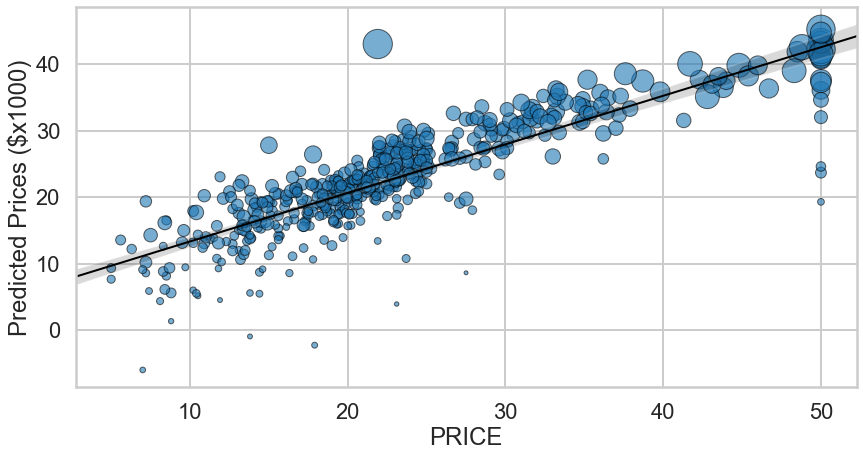

In [263]:
#Scatterplot:
_=plt.figure(figsize=(14,7))
_=sns.regplot(x=bos.PRICE,y=pred, scatter_kws={'s':np.exp(bos.RM/1.3), 'edgecolor':'k', 'alpha':.6}, 
              line_kws={'color':'k', 'alpha':1, 'linewidth':2}, truncate=False)

The fit using sklearn's LinearRegression appears to have performed better, but still displays some of the same behavior as before, such as the range of values showing disagreement at 50K. There is reasonably good agreement for most of the predictions which can be seen in the tight grouping around the line. Throughout, however, there are still a few under and over estimations that show some disagreement between true and predicted price.

Statsmodels regressions give more information that sklearn. The R and F scores, for example are printed along with the coefficients for the model fit. These can be very useful for saving time. One disadvantage of using statsmodels is that the code for model fitting is somewhat unique, and more R like than Python. It could be time consuming finding the right code to fit the model. 

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [264]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

12228.046261044006


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [265]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31908.789708316443


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [266]:
# your turn
lm2 = LinearRegression()
x=pd.DataFrame(bos['PTRATIO'])
reg = lm2.fit(x, bos['PRICE'])
print('The slope:',reg.coef_,'and intercept:',reg.intercept_)

The slope: [-2.1571753] and intercept: 62.344627474832706


The intercept is the value that would be predicted at the nonsensical value of 0 students to teachers. The negative slope is far more important, because it shows that there is a drop of approximately 2.15K in housing price for every increase of one student per teacher.

In [267]:
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           1.61e-34
Time:                        08:38:40   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

The slope is negative, meaning that the price of houses decreases by about $2,200 every time the pupil/teacher ratio increases by one. The intercept might be somewhat misleading, because zero students per pupil is not realistic, and would not need to be considered. There aren't many neighborhoods with no children who are concerned with ratio. The intercept helps to give a better fit to the data, however, providing a better starting point for the fit line.

The R-squared value is .258. It tells us the percentage of the variance explained by the model. Ideally this would be large to indicate a strong correlation between features.

The F-statistic is 175.1. We can use it to calculate a p-value.



<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [268]:
# your turn
testing = pd.DataFrame(bos[['CRIM','RM','PTRATIO','PRICE']])

model = ols('PRICE ~ CRIM + RM + PTRATIO',bos)
results = model.fit()
pred=model.predict(np.transpose(testing))
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           6.15e-98
Time:                        08:38:40   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

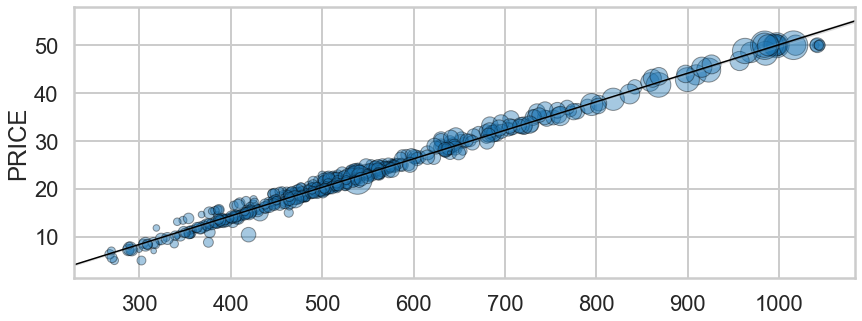

In [269]:
_=plt.figure(figsize=(14,5))
_=sns.regplot(pred[2], y=bos.PRICE, scatter_kws={'s':np.exp(bos.RM/1.3), 'edgecolor':'k', 'alpha':.4}, 
              line_kws={'color':'k', 'alpha':1, 'linewidth':1.5}, truncate=False)

The summary provided by statsmodels gives us the F-statistic. It is 245.2, much higher than with PTRATIO alone. This is a good indicator that this model is performing better than its counterpart. From the F-statistic we can get the p-value, which is zero for each coefficient and .404 for the intercept. This tells us that the chosen features are statistically significant in determining the price, but the intercept, less so (as previously explained). 

The R-squared value is also higher, reaching .594; another good indication. This tells us that our model can account for about about 60% of the variance in the price. Much better than the 26% seen before. Better performance can be seen in the scatterplot of predictions vs. prices. The points show a clear linear relationship, making a tight cluster around where a regression line can be clearly imagined. There are also no predictions in the negatives, another drastic improvement. 

The coefficients in the model tell us how much the house price estimate will change with a given one unit change in that feature. The only positive coefficient is RM, meaning that the house price increases with each room added by $7380. PTRATIO and CRIM both have negative coefficients correspodnding to a drop in the price with each unit increase per feature. Oddly, it appears that house price drops more quickly with an increase in PTRATIO than an increase in CRIM.  The p-value for each feature is zero, indicating that all of them are statistically significant predictors in this model.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [270]:
# your turn
testing2 = pd.DataFrame(bos[['CRIM','RM','PTRATIO','DIS','NOX','PRICE']])
model = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + NOX',bos)
results = model.fit()
pred2=model.predict(np.transpose(testing2))
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     176.1
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          8.11e-108
Time:                        08:38:43   Log-Likelihood:                -1583.3
No. Observations:                 506   AIC:                             3179.
Df Residuals:                     500   BIC:                             3204.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6319      5.033      4.298      0.0

The AIC score is almost 50 points lower when adding the NOX and DIS features.

In [271]:
rss_full = np.sum((bos.PRICE - lm.predict(X)) ** 2)
rss1_reduced=np.sum((bos.PRICE-pred[0])**2)
rss2_reduced=np.sum((bos.PRICE - pred2[0])**2)
df_full = len(bos.PRICE)-len(bos.columns)-1
df1_reduced = len(bos.PRICE) - len(testing.columns) - 1
df2_reduced = len(bos.PRICE) - len(testing2.columns) - 1

F_mod1 = round(((rss1_reduced - rss_full)/(df1_reduced - df_full))/(rss_full/df_full),3)
F_mod2 = round(((rss2_reduced - rss_full)/(df2_reduced - df_full))/(rss_full/df_full),3)

print('The F score for the first model:',F_mod1,' and the second model with more features:',F_mod2)
print('The ratio of the two scores is',round(F_mod1/F_mod2,2))

The F score for the first model: 436456.375  and the second model with more features: 80145.854
The ratio of the two scores is 5.45


The model with more features has a lower F score, showing a better fit.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [272]:
# Your turn.
testing = pd.DataFrame(bos[['CRIM','RM','PTRATIO','PRICE']])

model = ols('PRICE ~ CRIM + RM + PTRATIO',bos)
fitted = model.fit()
pred=model.predict(np.transpose(testing))
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           6.15e-98
Time:                        08:38:44   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

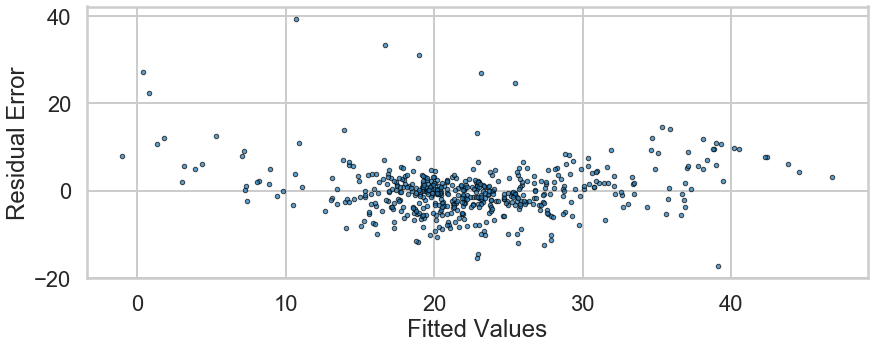

In [273]:
fitval = pd.DataFrame(fitted.fittedvalues)
resids = pd.DataFrame(fitted.resid)

_=plt.figure(figsize=(14,5))
_=plt.scatter(fitval, resids, edgecolor='k', alpha=.7, s=20, lw=1)
_=plt.xlabel('Fitted Values')
_=plt.ylabel('Residual Error')

#### 1 
The main assumption for the residuals is that they are normally distributed. This means that we should see most of the points clustered around $y=0$ zero in the graph above, getting less dense as the plot moves away from this mean.

Most of the plot seems to follow this trend, however there are a few residuals that fall well beyond the somewhat normal clustering of the others. These are the points with Residual Error above 20.

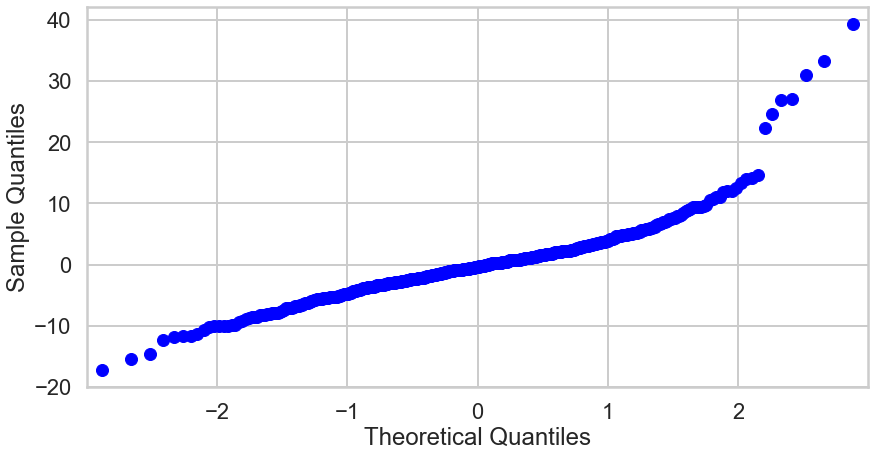

In [274]:
fig, ax = plt.subplots(figsize=(14,7))
sm.qqplot(fitted.resid, ax=ax)
plt.show()

#### 2
The quantile plot is a comparison of the distribution of the residuals to a theoretical normal distribution. Our assumption when creating the model was that the residual errors would be normally distributed. That means that ideally, the plot should be a straing line. The more linear the plot, the more normally distributed are the residual errors in the model.

#### 3
Comparing the quantile and the residual plot, they both seem to have utility. The quantile plot gives a visual description of how well the error in your model fits the theoretical assumption. This can be a quick and easy check on performance and need for data cleaning. The residual error plot gives you a visual description of how large the error is, as well as any patterns like outward funneling that violate the model assumptions.

They should be used together. They both give initial performance indications, but alone they only give you half the picture. With the quantile plot alone, you know how well your model matches assumptions, but that is all. With the residual error, you see more information about the error itself and any patterns that may occur, but do not get a good indication of how well the model fits the assumptions. Taken together, they can be used to identify and exploit trends in the residual error, improving overall model performance.

#### 4
There are seven outliers, taken to be the points that lie above 20 in both the fitted error and quantile plots. These represent points that do not fit the assumptions of the model. The reasons being could be a number of things. A large, two-story house built in a neighborhood with all one story houses, perhaps. 

However, to quickly and easily improve model performance, these can be manually removed if identified. 

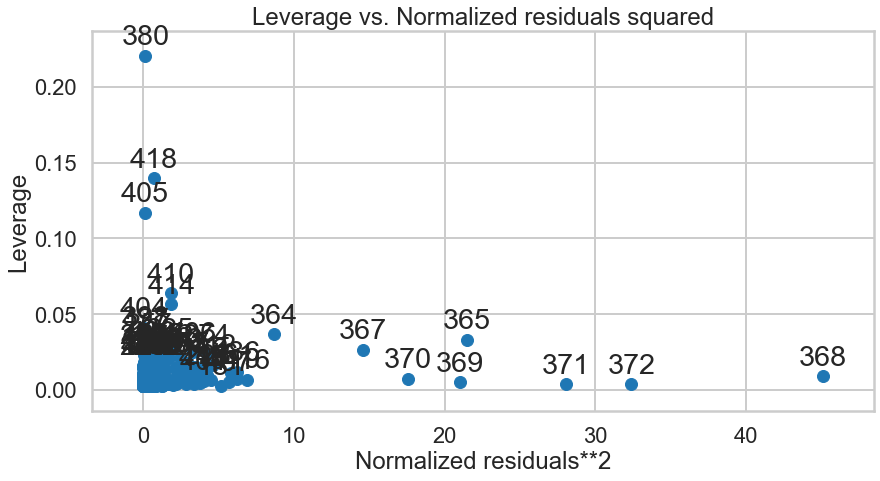

In [275]:
fig, ax = plt.subplots(figsize=(14,7))
fig=plot_leverage_resid2(fitted, ax=ax)
plt.show()

#### 5
The leverage plot makes our job easy and identifies the high leverage points for us. Here, the numbers represent the index of the point in the data frame. Thus, our points of interest are 380, 418, and 405. Subsequently, while they are not high leverage numerically, the points to the right of the cluster indicating high squared error should also be scrutinized. 

We will start with removing the the high leverage points and check the results. Next we will also remove the high error points to see if this helps as well.

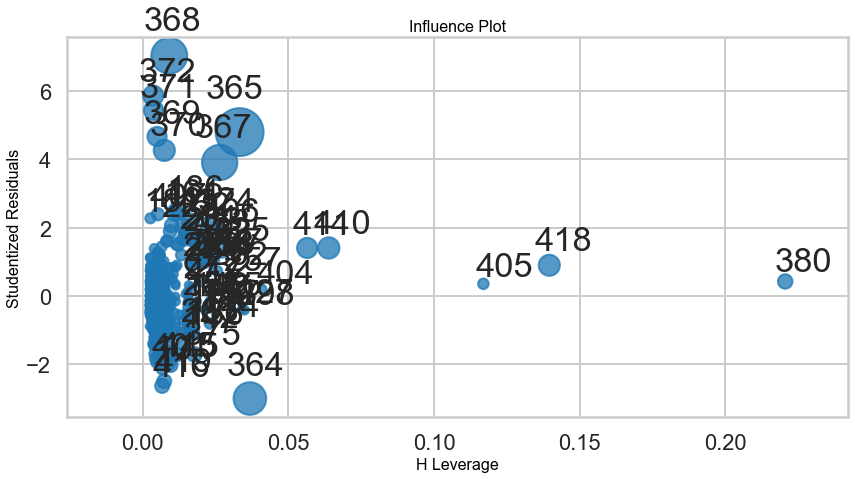

In [277]:

fig, ax = plt.subplots(figsize=(14,7))
sm.graphics.influence_plot(fitted, ax=ax)
plt.show()

#### 6

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     238.8
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           4.76e-96
Time:                        09:25:15   Log-Likelihood:                -1603.1
No. Observations:                 503   AIC:                             3214.
Df Residuals:                     499   BIC:                             3231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2366      4.047     -0.800      0.4

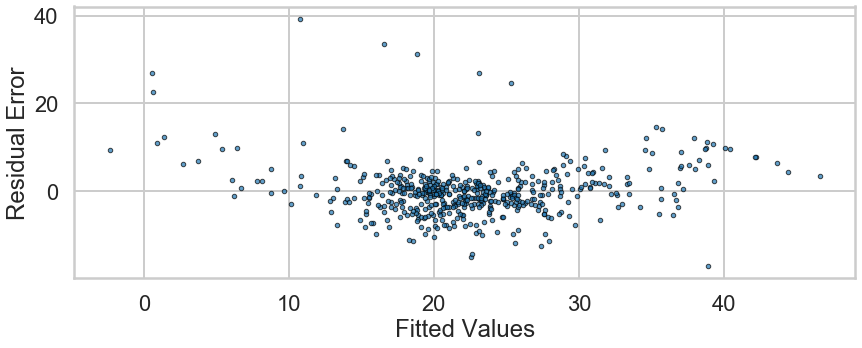

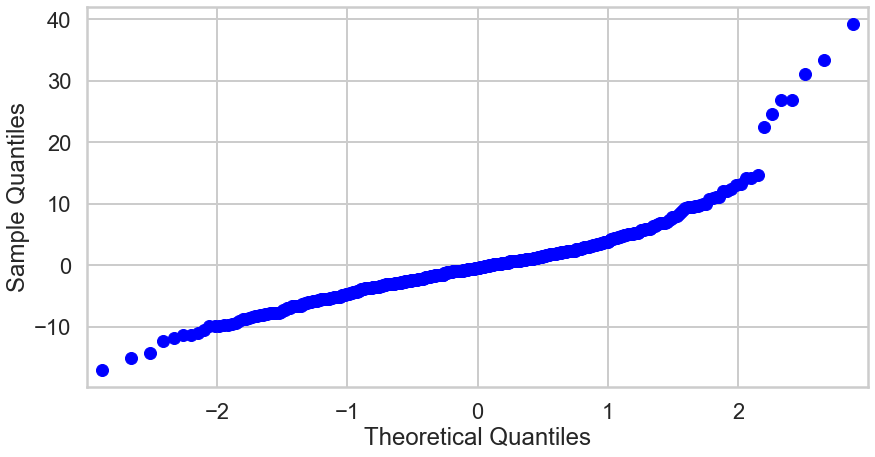

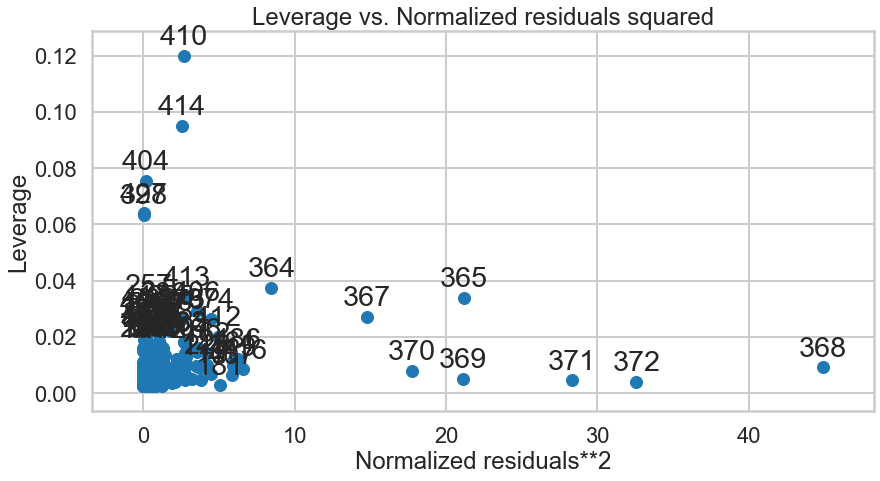

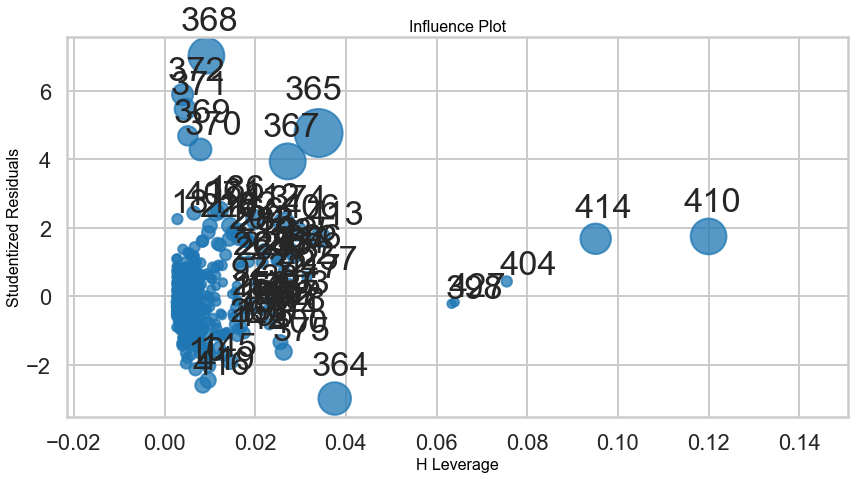

In [295]:
# We drop the rows with high leverage:
bos2 = bos.drop([380, 418, 405], axis=0)

# Fit the model using the trimmed data set:
testing = pd.DataFrame(bos2[['CRIM','RM','PTRATIO','PRICE']])

model = ols('PRICE ~ CRIM + RM + PTRATIO',bos2)
fitted = model.fit()
pred=model.predict(np.transpose(testing))
print(fitted.summary())

# Create a scatterplot of the newly fitted values:
fitval = pd.DataFrame(fitted.fittedvalues)
resids = pd.DataFrame(fitted.resid)

_=plt.figure(figsize=(14,5))
_=plt.scatter(fitval, resids, edgecolor='k', alpha=.7, s=20, lw=1)
_=plt.xlabel('Fitted Values')
_=plt.ylabel('Residual Error')

# Create a quantile plot of trimmed data model:
fig, ax = plt.subplots(figsize=(14,7))
sm.qqplot(fitted.resid, ax=ax)
plt.show()

# Create leverage and density plots:
fig, ax = plt.subplots(figsize=(14,7))
fig=plot_leverage_resid2(fitted, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14,7))
sm.graphics.influence_plot(fitted, ax=ax)
plt.show()

Removing the high leverage points actually decreased the performance of the model. The $R^2$ value is slightly less than before. 

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     421.5
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          7.11e-136
Time:                        09:25:45   Log-Likelihood:                -1478.3
No. Observations:                 499   AIC:                             2965.
Df Residuals:                     495   BIC:                             2982.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2283      3.291     -1.893      0.0

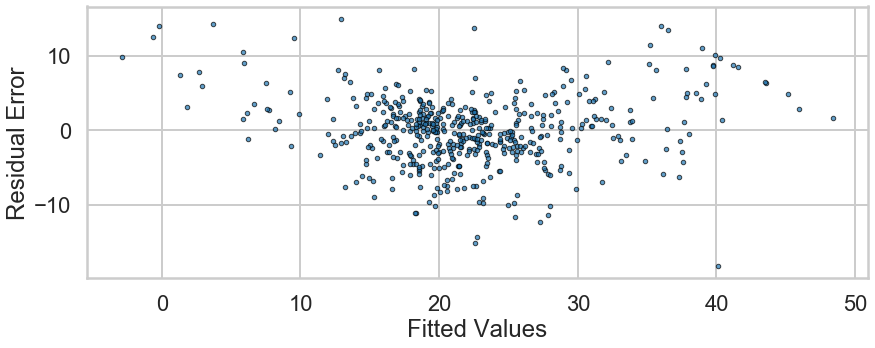

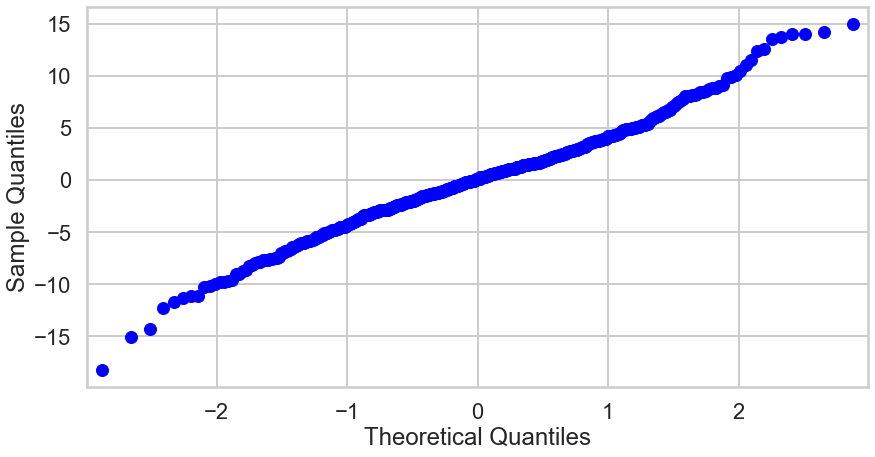

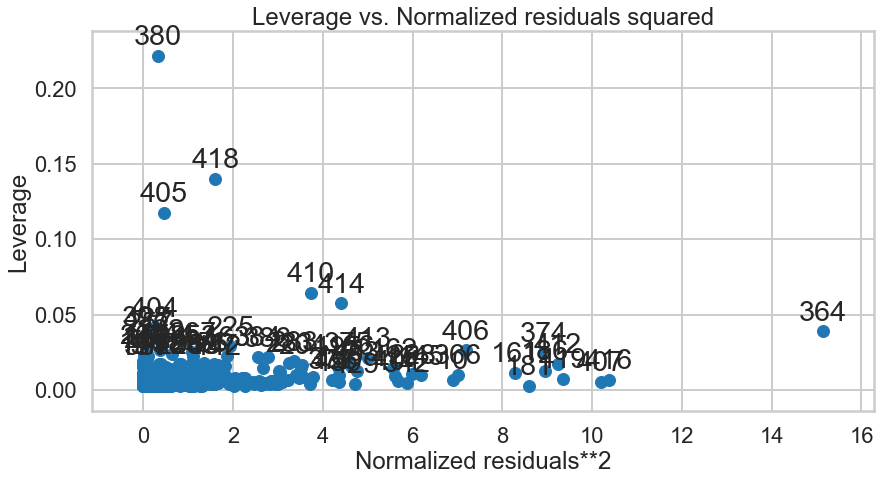

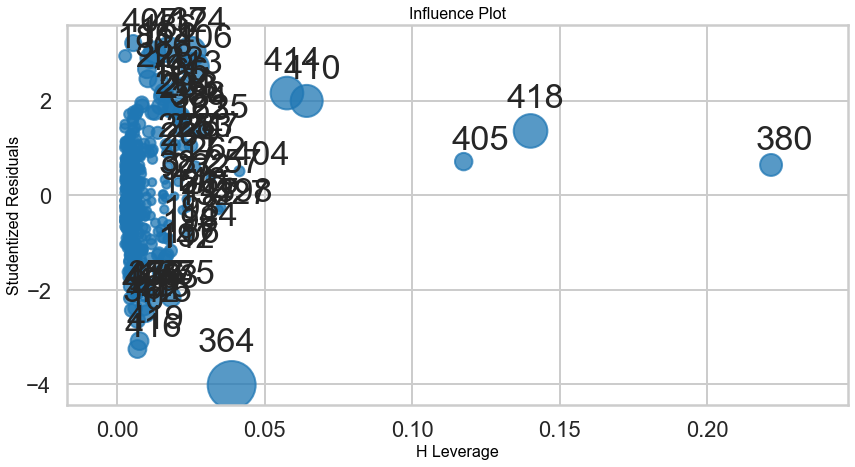

In [296]:
# Now we will see how removing only the outliers affects performance:
bos3 = bos.drop([365, 367, 368, 369, 370, 371, 372], axis=0)

# Fit the model using the trimmed data set:
testing = pd.DataFrame(bos3[['CRIM','RM','PTRATIO','PRICE']])

model = ols('PRICE ~ CRIM + RM + PTRATIO',bos3)
fitted = model.fit()
pred=model.predict(np.transpose(testing))
print(fitted.summary())

# Create a scatterplot of the newly fitted values:
fitval = pd.DataFrame(fitted.fittedvalues)
resids = pd.DataFrame(fitted.resid)

_=plt.figure(figsize=(14,5))
_=plt.scatter(fitval, resids, edgecolor='k', alpha=.7, s=20, lw=1)
_=plt.xlabel('Fitted Values')
_=plt.ylabel('Residual Error')

# Create a quantile plot of trimmed data model:
fig, ax = plt.subplots(figsize=(14,7))
sm.qqplot(fitted.resid, ax=ax)
plt.show()

# Create leverage and density plots:
fig, ax = plt.subplots(figsize=(14,7))
fig=plot_leverage_resid2(fitted, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14,7))
sm.graphics.influence_plot(fitted, ax=ax)
plt.show()

With the outliers removed and highe leverage points still in use, We see a marked increase in model performance. The increase in $R^2$ is about $.13$. Removing the outliers helps the model.

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     414.5
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          3.19e-134
Time:                        09:26:46   Log-Likelihood:                -1468.9
No. Observations:                 496   AIC:                             2946.
Df Residuals:                     492   BIC:                             2963.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0479      3.294     -1.836      0.0

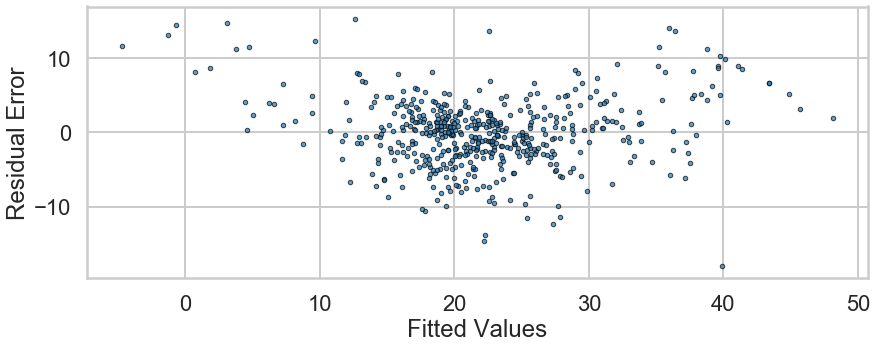

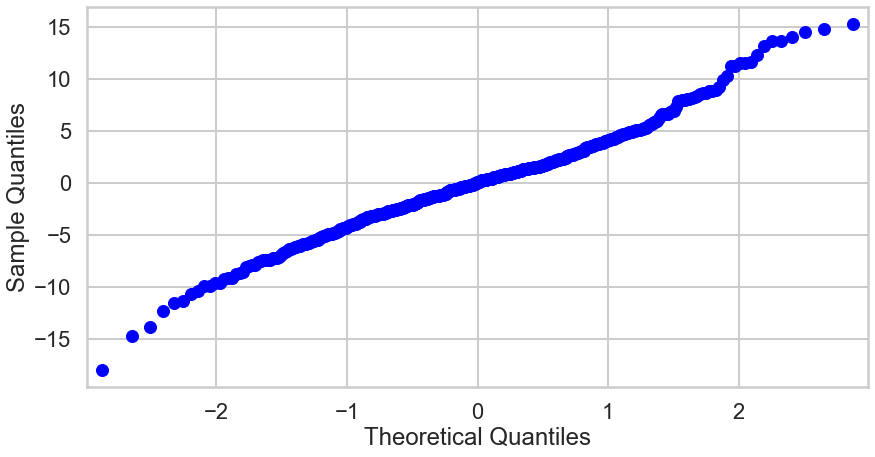

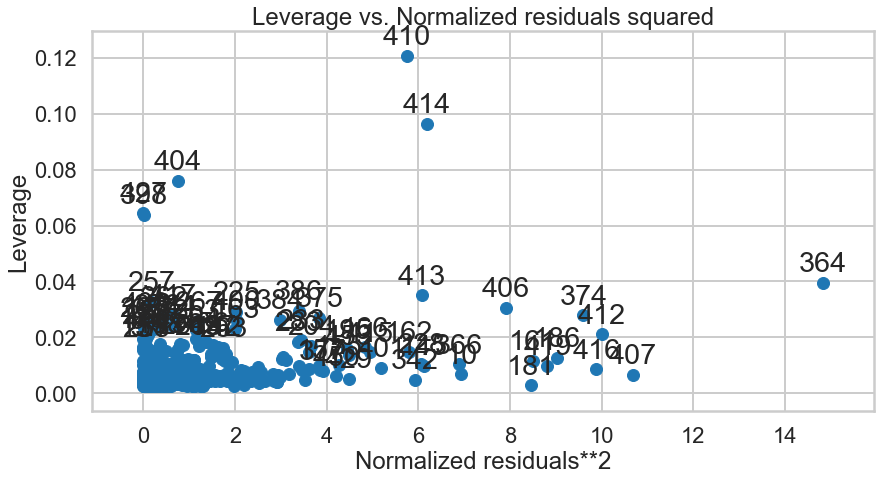

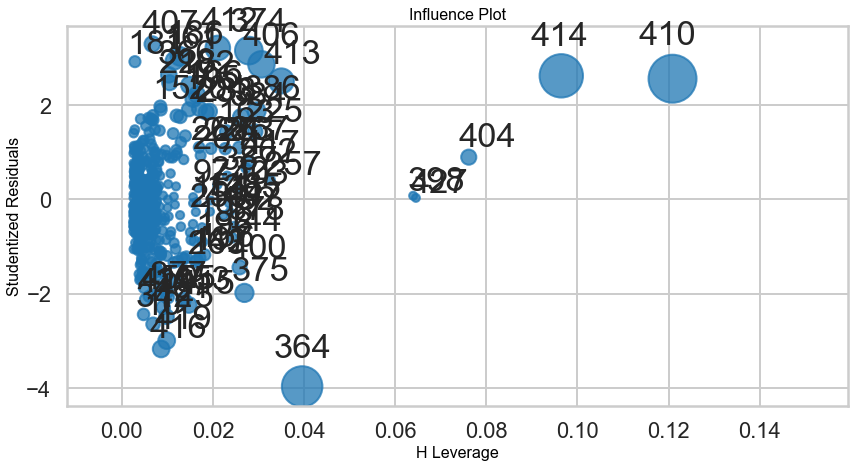

In [297]:
# Remove the outliers and high leverage points:
bos4 = bos.drop([365, 367, 368, 369, 370, 371, 372, 380, 405, 418], axis=0)

# Fit the model using the trimmed data set:
testing = pd.DataFrame(bos4[['CRIM','RM','PTRATIO','PRICE']])

model = ols('PRICE ~ CRIM + RM + PTRATIO',bos4)
fitted = model.fit()
pred=model.predict(np.transpose(testing))
print(fitted.summary())

# Create a scatterplot of the newly fitted values:
fitval = pd.DataFrame(fitted.fittedvalues)
resids = pd.DataFrame(fitted.resid)

_=plt.figure(figsize=(14,5))
_=plt.scatter(fitval, resids, edgecolor='k', alpha=.7, s=20, lw=1)
_=plt.xlabel('Fitted Values')
_=plt.ylabel('Residual Error')

# Create a quantile plot of trimmed data model:
fig, ax = plt.subplots(figsize=(14,7))
sm.qqplot(fitted.resid, ax=ax)
plt.show()

# Create leverage and density plots:
fig, ax = plt.subplots(figsize=(14,7))
fig=plot_leverage_resid2(fitted, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14,7))
sm.graphics.influence_plot(fitted, ax=ax)
plt.show()

Again removing the high leverage points slightly decreased the value of $R^2$. The results above show that removing the outliers with high error improves model performance.

# Conclusion

Linear Regression in a powerful predictive tool. By comparing the error between predictions and observations, then minimizing that error to get better model parameters. This leads to a better fit when the model is run again. The process is iterated until a minimum error is reached, giving optimum values for the model parameters.

The choice of how to use these parameters can affect model performance. The choice to calculate an intercept or not, for example, can drastically change the other coefficients and, hence, the fidelity of the fit. Many tools are available in the statsmodels and scikit-learn packages to create, fit, and evaluate models. Performance can be improved by removing outliers from the data. These can be identified by plotting leverage and influence plots. These tools are important becasue they allow us to confirm that the data and the model don't violate the theoretical assumptions of the derivation. One of these is that the error should be normally distributed for each point. Model performance can be analyzed and optimized using these tools.